In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [2]:
file = files.upload()

Saving Employee.csv to Employee.csv


In [14]:
df = pd.read_csv('Employee.csv')

In [15]:
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [17]:
#Cleaning the data 
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [18]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [19]:
df['is_duplicated'] = df.duplicated()

In [20]:
df['is_duplicated'].value_counts()

False    2764
True     1889
Name: is_duplicated, dtype: int64

In [21]:
true_index = df.index[df['is_duplicated']]
true_index

Int64Index([ 111,  130,  138,  160,  167,  174,  175,  176,  177,  181,
            ...
            4630, 4631, 4633, 4635, 4638, 4640, 4642, 4646, 4648, 4652],
           dtype='int64', length=1889)

In [22]:
df.drop(index = true_index, axis = 0, inplace = True)


In [23]:
df.shape
# now we have deleted the duplicate data

(2764, 10)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


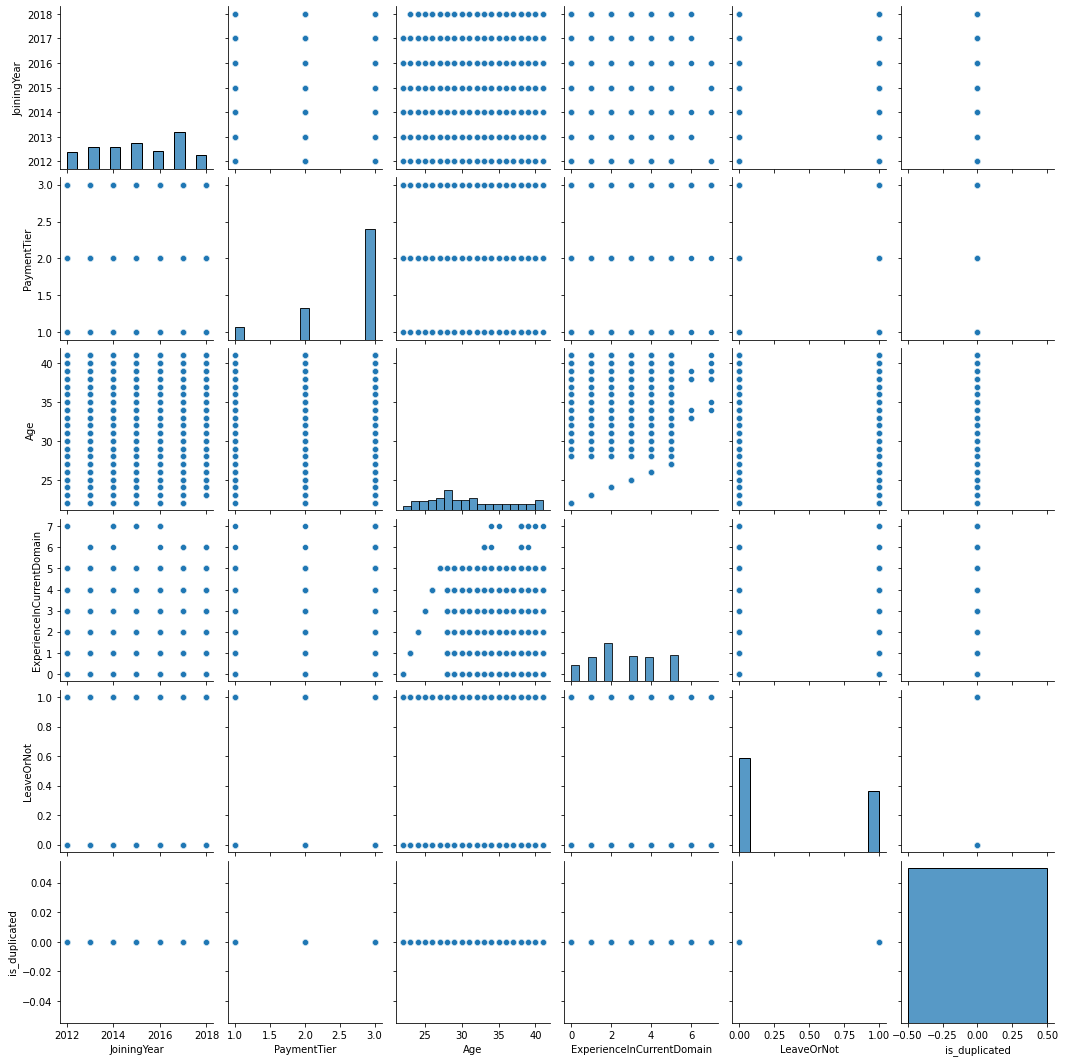

In [24]:
#Visualize the data
sns.pairplot(df)

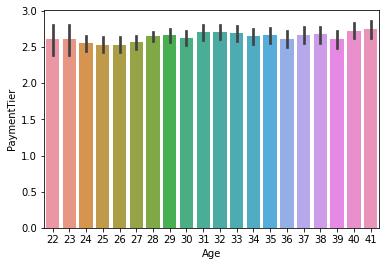

In [25]:
sns.barplot(data = df, x = 'Age', y ='PaymentTier')

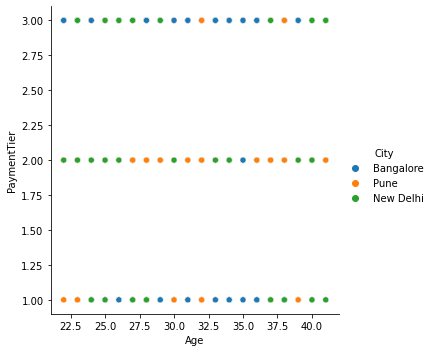

In [26]:
sns.relplot(data = df, x = 'Age', y = 'PaymentTier', hue = 'City')

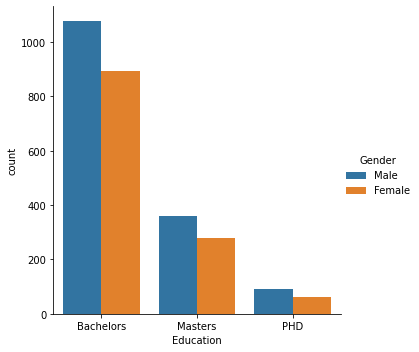

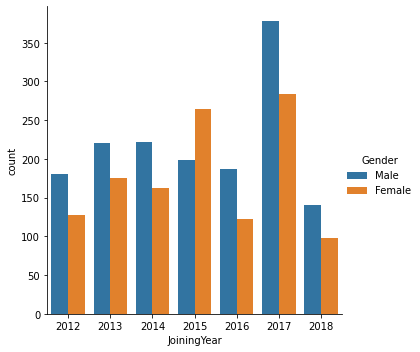

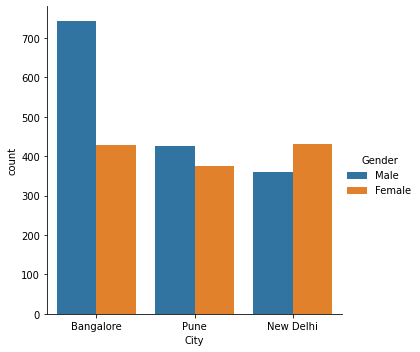

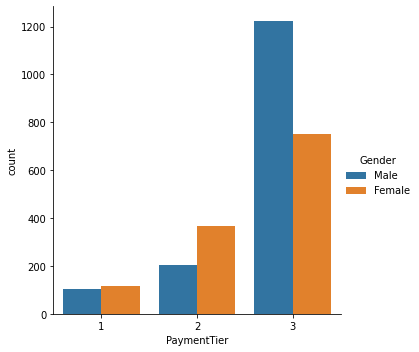

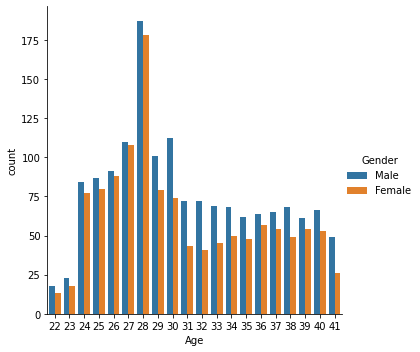

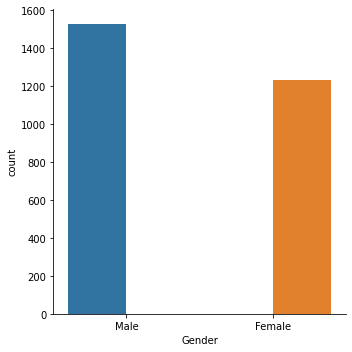

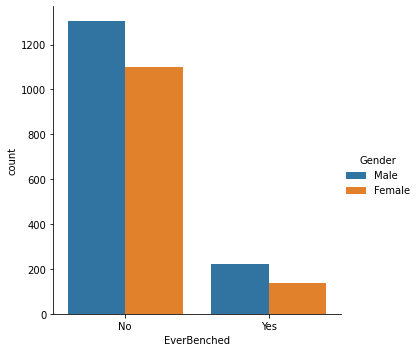

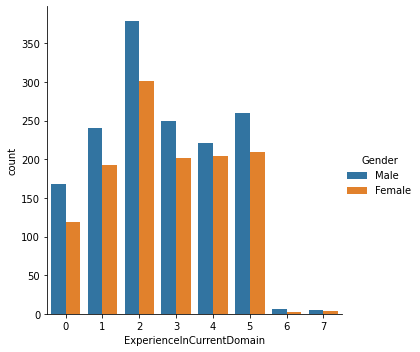

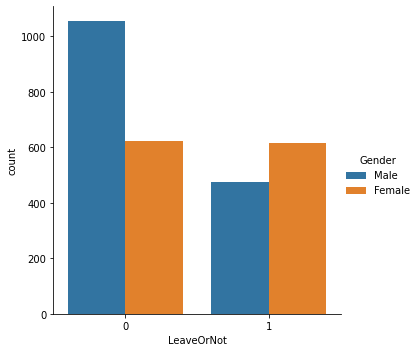

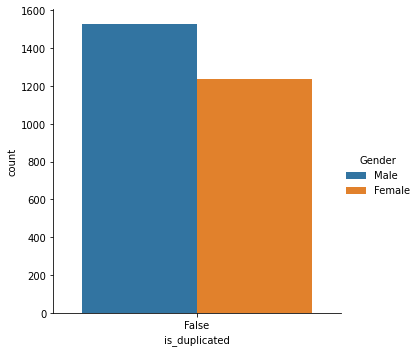

In [27]:
for i in df.columns :
  sns.catplot(data = df, x =i, kind = 'count', hue = 'Gender')

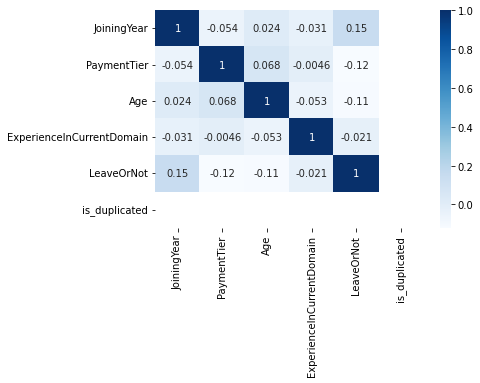

In [28]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', cbar= True)
# from the table there are no specific columns that has the big correlation score

In [29]:
# Convert string Values int Integer Values
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['City'] = LabelEncoder().fit_transform(df['City'])
df['EverBenched'] = LabelEncoder().fit_transform(df['EverBenched'])
#Selecting x and y dataset
x = df.drop(['is_duplicated', 'LeaveOrNot'], axis = 1)
y = df['LeaveOrNot']

In [30]:
#Retrieving train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 10, test_size = 0.1)

In [31]:
#Process the Data
rfc = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

In [32]:
rfc.fit(x_train, y_train)
lr.fit(x_train, y_train)
knn.fit(x_train, y_train)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
rfcpred = rfc.predict(x_test)
lrpred = lr.predict(x_test)
knnpred = knn.predict(x_test)
dtcpred = dtc.predict(x_test)

In [48]:
rfc_accuracy = accuracy_score(rfcpred, y_test)
print("The accuracy from RandomForestClassifier {}".format(rfc_accuracy))

The accuracy from RandomForestClassifier 0.7545126353790613


In [55]:
lr_accuracy = accuracy_score(lrpred, y_test)
print("The accuracy from LogisticRegression {}".format(lr_accuracy))

The accuracy from LogisticRegression 0.6173285198555957


In [50]:
knn_accuracy = accuracy_score(knnpred, y_test)
print("The accuracy from KNN {}".format(knn_accuracy))

The accuracy from KNN 0.6859205776173285


In [51]:
dtc_accuracy = accuracy_score(dtcpred, y_test)
print("The accuracy from DecisionTrees {}".format(dtc_accuracy))

The accuracy from DecisionTrees 0.7256317689530686


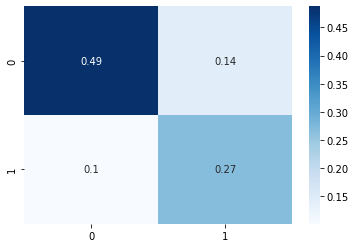

In [52]:
cfm_rfc = confusion_matrix(rfcpred, y_test)
sns.heatmap(cfm_rfc/np.sum(cfm_rfc), annot = True, cmap = 'Blues', cbar = True)

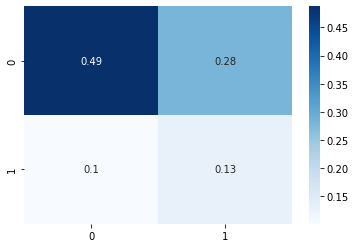

In [56]:
cfm_lr = confusion_matrix(lrpred, y_test)
sns.heatmap(cfm_lr/np.sum(cfm_lr), annot = True, cmap = 'Blues', cbar = True)

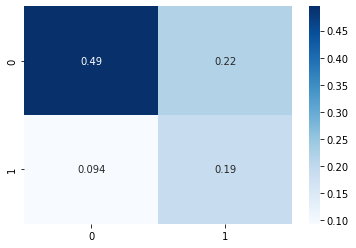

In [57]:
cfm_knn = confusion_matrix(knnpred, y_test)
sns.heatmap(cfm_knn/np.sum(cfm_knn), annot = True, cmap = 'Blues', cbar = True)

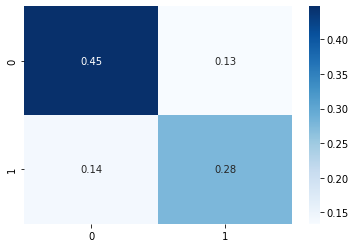

In [58]:
cfm_dtc = confusion_matrix(dtcpred, y_test)
sns.heatmap(cfm_dtc/np.sum(cfm_dtc), annot = True, cmap = 'Blues', cbar = True)